In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
df = pd.read_csv("superhero_movies_dataset.csv")
df.head(5)

,Year,Film,Publisher,Director,Distributor,Worldwide_Gross,Description
0,1937,The Shadow Strikes,Street & Smith,Lynn Shores,Grand National Films Inc.,NaN,Film featuring The Shadow character.
1,1938,International Crime,Street & Smith,Charles Lamont,Grand National Films Inc.,NaN,Film featuring The Shadow character.
2,1945,Dick Tracy,Detroit Mirror,William Berke,RKO Pictures,NaN,Film featuring the character Dick Tracy.
3,1946,The Shadow Returns',Street & Smith,"Phil Rosen, William Beaudine",Monogram Pictures,NaN,Part of The Shadow franchise.
4,1946,Behind the Mask',Street & Smith,Phil Karlson,Monogram Pictures,NaN,Film featuring The Shadow character.


In [3]:
df.isnull().sum()

Year                 0
Film                 0
Publisher            0
Director             0
Distributor          0
Worldwide_Gross    128
Description        112
dtype: int64

In [4]:
df.tail(5)

,Year,Film,Publisher,Director,Distributor,Worldwide_Gross,Description
402,2024,Borderlands,Gearbox Software,Eli Roth,Lionsgate Films (Summit Entertainment),"Theatrical ($32,687,932)",Based on a video game of the same name
403,2024,The Crow,Caliber Comics,Rupert Sanders,Lionsgate Films,"Theatrical ($21,105,349)",Reboot of the same name Co-produced with Media...
404,2024,Sonic the Hedgehog 3,Sega Sammy Group,Jeff Fowler,Paramount Pictures,"Theatrical ($491,603,986)",Hybrid film with both live-action and animatio...
405,2025,Henry Danger: The Movie,Original,Joe Menendez,Paramount Pictures (Paramount+),NaN,Continuation of the television series Henry Da...
406,2025,Novocaine,Original,Dan Berk and Robert Olsen,Paramount Pictures,"Theatrical ($11,349,008)",NaN


In [5]:
df.dtypes

Year                int64
Film               object
Publisher          object
Director           object
Distributor        object
Worldwide_Gross    object
Description        object
dtype: object

In [6]:
df.describe()

,Year
count,407.000000
mean,2002.368550
std,16.081896
min,1937.000000
25%,1994.000000
50%,2005.000000
75%,2014.000000
max,2025.000000


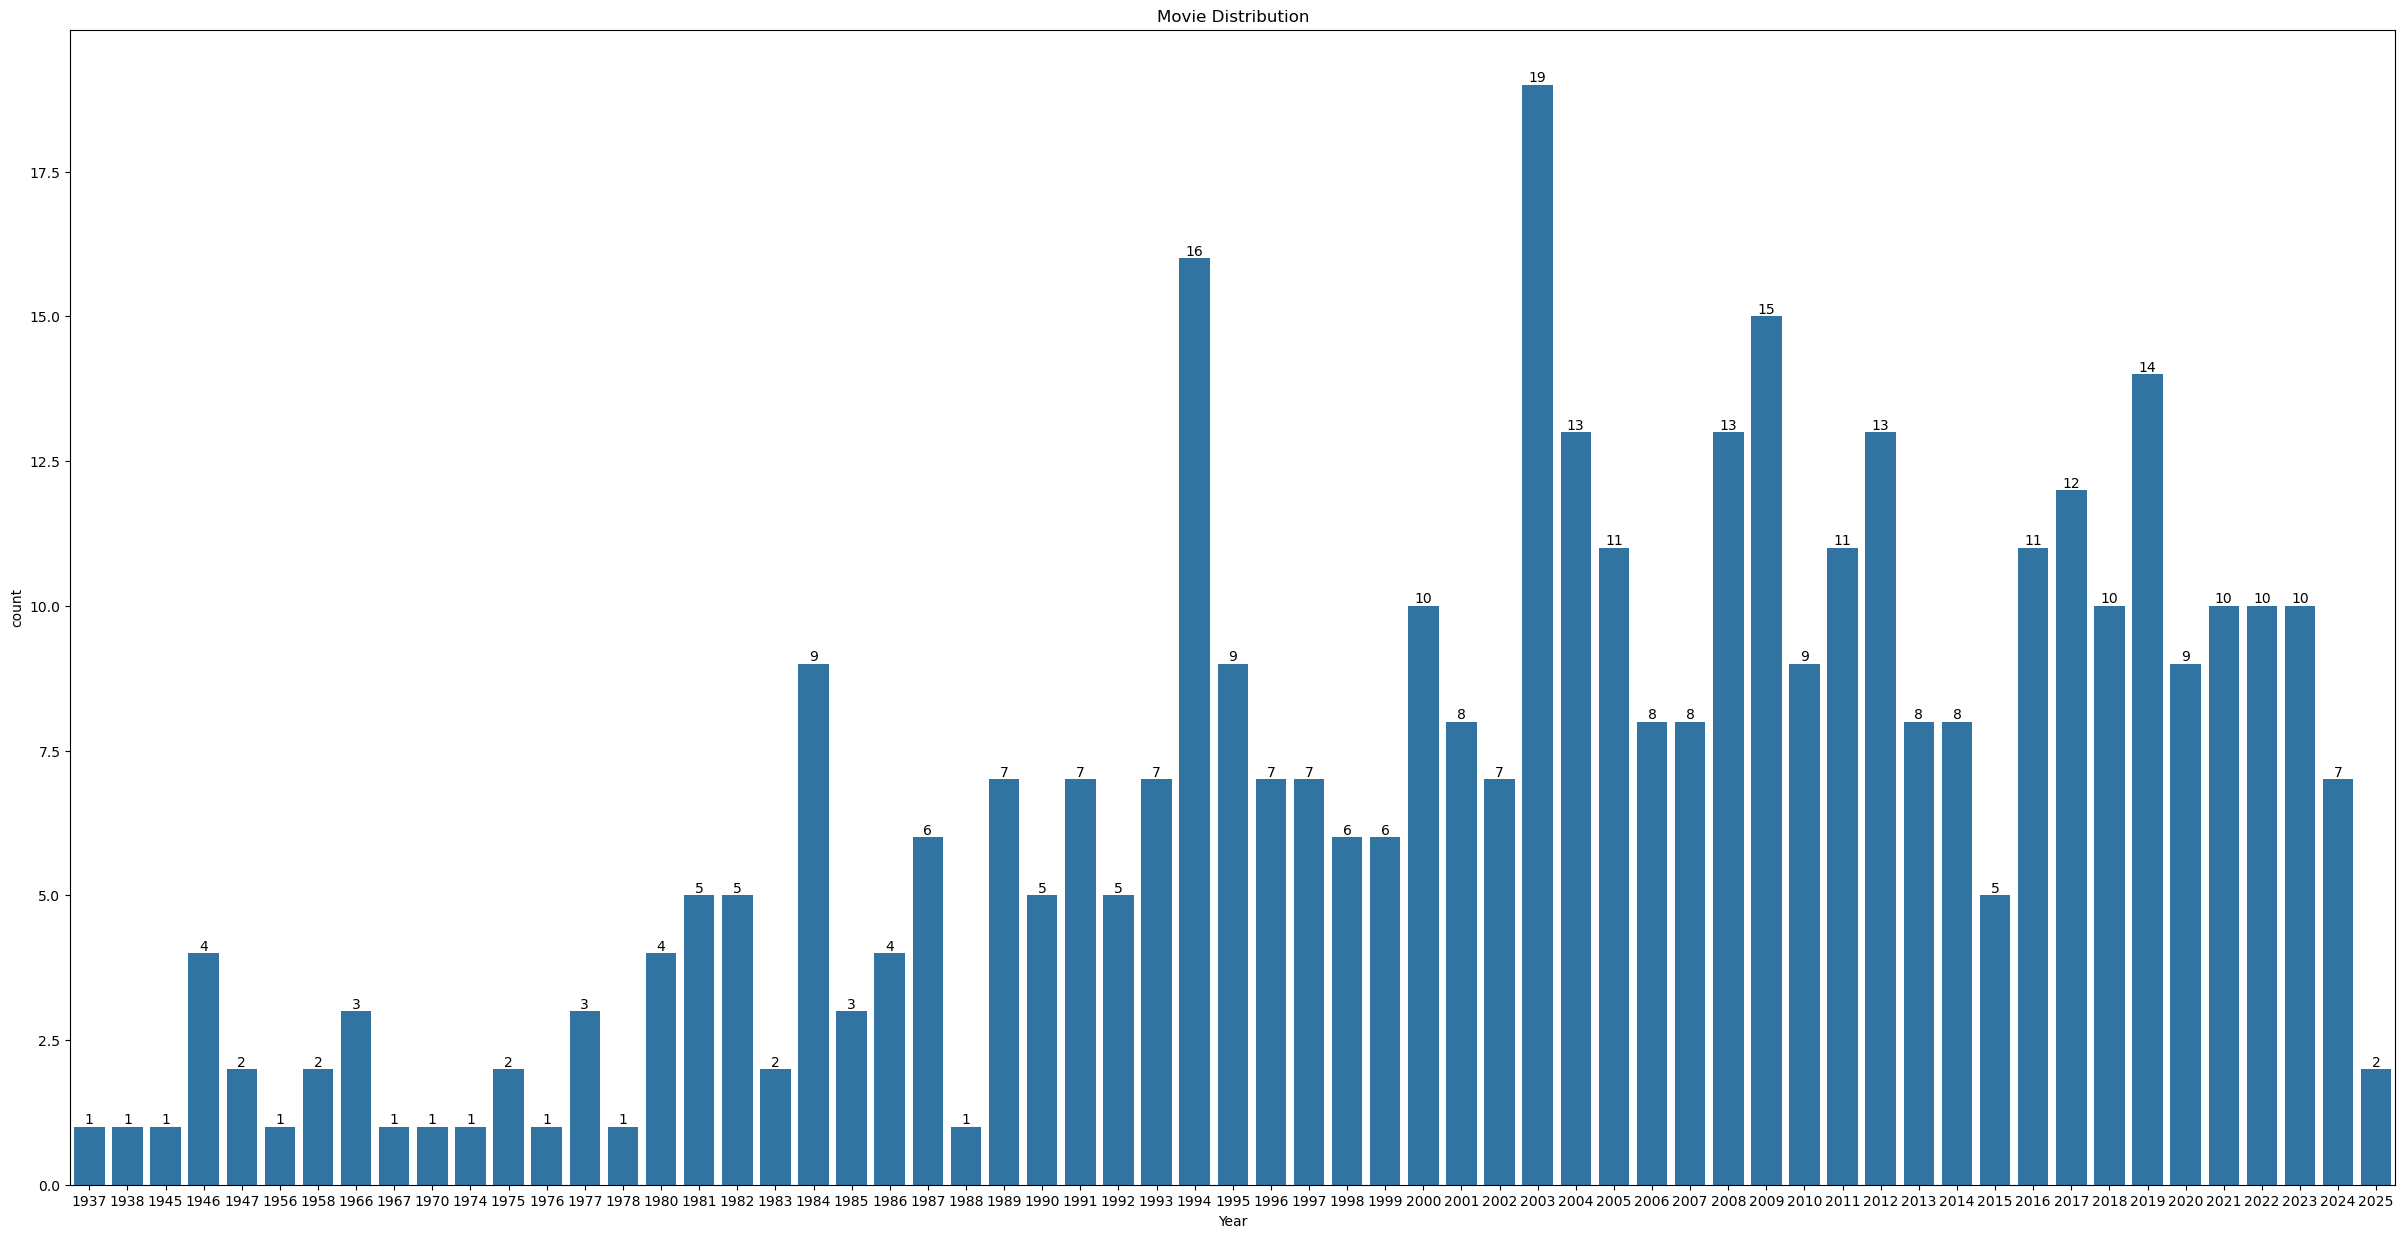

In [15]:
plt.figure(figsize=(30,15))
movieDistribution = sbn.countplot(data=df, x = "Year")
movieDistribution.bar_label(movieDistribution.containers[0])
plt.title("Movie Distribution")
plt.show()

In [ ]:
gb = df.groupby("Year").agg({})